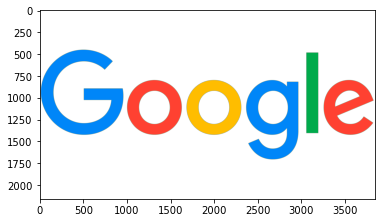

In [228]:
plt.imshow(mpimg.imread('../static/images/Google-logo.png'))

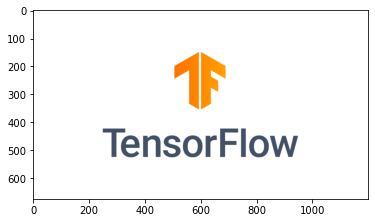

In [227]:
plt.imshow(mpimg.imread('../static/images/tf_logo_social.png'))

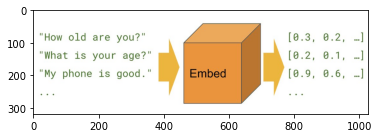

In [232]:
plt.imshow(mpimg.imread('../static/images/USE.jpg'))

@misc{https://doi.org/10.48550/arxiv.1803.11175,
  doi = {10.48550/ARXIV.1803.11175},
  
  url = {https://arxiv.org/abs/1803.11175},
  
  author = {Cer, Daniel and Yang, Yinfei and Kong, Sheng-yi and Hua, Nan and Limtiaco, Nicole and John, Rhomni St. and Constant, Noah and Guajardo-Cespedes, Mario and Yuan, Steve and Tar, Chris and Sung, Yun-Hsuan and Strope, Brian and Kurzweil, Ray},
  
  keywords = {Computation and Language (cs.CL), FOS: Computer and information sciences, FOS: Computer and information sciences},
  
  title = {Universal Sentence Encoder},
  
  publisher = {arXiv},
  
  year = {2018},
  
  copyright = {arXiv.org perpetual, non-exclusive license}
}


@misc{https://doi.org/10.48550/arxiv.1603.09320,
  doi = {10.48550/ARXIV.1603.09320},
  
  url = {https://arxiv.org/abs/1603.09320},
  
  author = {Malkov, Yu. A. and Yashunin, D. A.},
  
  keywords = {Data Structures and Algorithms (cs.DS), Computer Vision and Pattern Recogniti on (cs.CV), Information Retrieval (cs.IR), Social and Information Networks (cs.SI), FOS: Computer and information sciences, FOS: Computer and information sciences},
  
  title = {Efficient and robust approximate nearest neighbor search using Hierarchical Navigable Small World graphs},
  
  publisher = {arXiv},
  
  year = {2016},
  
  copyright = {arXiv.org perpetual, non-exclusive license}
}



Welcome to a use of TensorFlow, TensorFlow Model Hub, and Google's Universal Sentence Encode to perform feature extraction on the University of Southern Indiana's 2022-2023 description of all courses. To do our work requires some basic NLP text parsing skills to create a dataset, and from there we can obtain our embeddings (aka feature vectors). After creating embeddings (aka feature vectors) of all descriptions we will create a Hierarchical Navigable Small World graph of our embeddings to query our vectors for the most similar vector using cosine similarity.

Surprisingly, the results are pretty good without doing ANY transfer learning!

In [193]:
with open('dept_ids.txt', 'r') as dept_ids:
    data = dept_ids.read()
    dept_names = data.split(' ')
    dept_names.remove("\n")
    print(dept_names)

['ACCT', 'ADV', 'AFRC', 'AGBU', 'AHA', 'ANTH', 'ARAB', 'ART', 'ARTD', 'ARTE', 'ARTH', 'ARTP', 'ASTR', 'BAN', 'BCOM', 'BIOL', 'BLAW', 'BUAD', 'CE', 'CHEM', 'CHIN', 'CIS', 'CMST', 'COMM', 'CRIM', 'CS', 'DMS', 'DSCI', 'DTAS', 'DTHY', 'DVT', 'ECE', 'ECHO', 'ECON', 'EDUC', 'ENG', 'ENGR', 'EXSC', 'FIN', 'FREN', 'GENS', 'GEOG', 'GEOL', 'GERM', 'GERO', 'GLST', 'GNDR', 'HA', 'HI', 'HIST', 'HONS', 'HP', 'HUM', 'IEP', 'IME', 'IPH', 'JPN', 'JRN', 'KIN', 'LATN', 'LIBA', 'MATH', 'ME', 'MFET', 'MKTG', 'MNGT', 'MS', 'MUS', 'NURS', 'NUTR', 'OTA', 'PET', 'PH', 'PHIL', 'PHYS', 'POLS', 'PRFS', 'PRL', 'PSY', 'RADT', 'RELS', 'REST', 'RTV', 'SOC', 'SOCW', 'SPAN', 'SPTM', 'STAT', 'STEM', 'TECH', 'THTR', 'UNIV', 'WLC']


We will now parse through our text. We will want a dictionary object for each course. First we will find the lines that start with the department names and then fill in our dictionary with that info, then add the subsequent text as our course description.


JSON: courses[[{course_dept:DEPT, course_number:COURSE_NUM, course_title:COURSE_TILE, course_description:COURSE_DESCRIPTION, 'USE_embedding': None}]]

In [210]:
import re
import json


courses = []

registrar_file = open('output.txt')
registrar_file_iter = iter(registrar_file)

for line in registrar_file_iter:
    if line.startswith(tuple(dept_names)):
        course_dict = {'course_dept': '', 'course_number': '', 'course_title':'', 'course_description':'', 'USE_embedding': None}
        course_description = ''
        line_split = line.split(" ")
        course_dict['course_dept'] = line_split[0]
        course_dict['course_number'] = line_split[1]
        course_dict['course_title'] = " ".join(line_split[3:-1])
        line = next(registrar_file_iter)
        while not line.startswith(tuple(dept_names)):
            line.rstrip()
            course_description = course_description+line
            line = next(registrar_file_iter)
        course_description = re.sub('\n' ,'', course_description)          
        course_dict['course_description'] = course_description
        courses.append(course_dict)


In [196]:
print(courses)

[{'course_dept': 'ACCT', 'course_number': '201', 'course_title': 'Accounting Principles I', 'course_description': "Credits: 3  Required: Business Core requirement for all business majors. A study of the principles of financial accounting and reporting as they relate to today's business environment. Both the procedures used and the concepts upon which they are based will be studied.  Prereq (may be taken concurrently): CIS 201  This course is part of the Core Transfer Library (CTL) Term(s) Offered: Fall, Spring, Summer ", 'description_vector_USE': None}, {'course_dept': 'ACCT', 'course_number': '303', 'course_title': 'Intermediate Accounting I', 'course_description': 'Credits: 3  Required: Required for all accounting majors. An intensive study and application of Generally Accepted Accounting Principles (GAAP) for asset valuation, income measurement, and financial statement presentation for business organizations, including the processes through which GAAP has evolved. The emphasis in th

In [229]:
with open('data.json', "w") as f:
    json.dump(courses, f)

In [211]:
print(courses[150])

{'course_dept': 'CMST', 'course_number': '314', 'course_title': 'Organizational Communication', 'course_description': 'Credits: 3  A review of the research and theoretical approaches to organizational communication. This course includes an examination of the process of selecting appropriate communication channels, a consideration of the ways in which meaning, both verbal and nonverbal, is conveyed, and an exploration of ways in which communication can help to alleviate typical interpersonal problems within organizations.  Prerequisite(s): CMST 204 (grade of C or better) or BCOM 231 (grade of C or better)  Term(s) Offered: Fall, Spring, Summer ', 'USE_embedding': None}


To proceed with out work from Notebook 1, we will have to install required packages for doing our vectorization of our course descriptions found in the list and JSON object created in Notebook 1. 



Beginning Notebook 2:

In [179]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 KB 1.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [13]:
!pip install --upgrade tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable


In [25]:
!pip install hnswlib

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.6.2-cp310-cp310-linux_x86_64.whl size=2080146 sha256=24fd41dc0166d22d2d94e6c455ebb4f72c6cfd72907ed9ea57d6ea2de6ea3121
  Stored in directory: /home/dylan/.cache/pip/wheels/b3/51/94/2e27c3c7bddd94d1ca6852f497e9ad7989d3f1e0dcf551e10b
Successfully built hnswlib


# Verify your packages installed correctly, and that TensorFlow sees your GPU.

In [14]:
import tensorflow as tf

In [222]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [130]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Load the Universal Sentence Encord from the TensorFlow model hub, and define a function to create an embedding from the model.


Source of Code: https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder

In [4]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder-lite/2"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)


module https://tfhub.dev/google/universal-sentence-encoder-lite/2 loaded


Let's have a look at one of our datapoint in the list of courses. Notice that they key, "description_vector_USE"

In [212]:
print(courses[0])

{'course_dept': 'ACCT', 'course_number': '201', 'course_title': 'Accounting Principles I', 'course_description': "Credits: 3  Required: Business Core requirement for all business majors. A study of the principles of financial accounting and reporting as they relate to today's business environment. Both the procedures used and the concepts upon which they are based will be studied.  Prereq (may be taken concurrently): CIS 201  This course is part of the Core Transfer Library (CTL) Term(s) Offered: Fall, Spring, Summer ", 'USE_embedding': None}


Compute a representation for each message, showing various lengths supported.

Source: https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder

In [213]:
descriptions = []

for course in courses:
    
    course_description = (course['course_description'])
    descriptions.append(course_description)

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(descriptions)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(descriptions[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

print(np.array(message_embeddings))


Message: Credits: 3  Required: Business Core requirement for all business majors. A study of the principles of financial accounting and reporting as they relate to today's business environment. Both the procedures used and the concepts upon which they are based will be studied.  Prereq (may be taken concurrently): CIS 201  This course is part of the Core Transfer Library (CTL) Term(s) Offered: Fall, Spring, Summer 
Embedding size: 512
Embedding: [0.0022595461923629045, -0.07936546951532364, -0.019031358882784843, ...]

Message: Credits: 3  Required: Required for all accounting majors. An intensive study and application of Generally Accepted Accounting Principles (GAAP) for asset valuation, income measurement, and financial statement presentation for business organizations, including the processes through which GAAP has evolved. The emphasis in this course is on the basic financial statements and related footnotes, the time value of money, the valuation and presentation of assets, curre

In [214]:
print(len(np.array(message_embeddings)))


844


In [215]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

#print(message_embeddings[0])

for i, message_embedding in enumerate(message_embeddings):
    ##print(message_embedding)
    courses[i]['USE_embedding'] = message_embedding.tolist()



#print(message_embedding_list[0])
    
#print(courses[0]['course_vector_USE'])
print(courses[0])

{'course_dept': 'ACCT', 'course_number': '201', 'course_title': 'Accounting Principles I', 'course_description': "Credits: 3  Required: Business Core requirement for all business majors. A study of the principles of financial accounting and reporting as they relate to today's business environment. Both the procedures used and the concepts upon which they are based will be studied.  Prereq (may be taken concurrently): CIS 201  This course is part of the Core Transfer Library (CTL) Term(s) Offered: Fall, Spring, Summer ", 'USE_embedding': [0.0022595461923629045, -0.07936546951532364, -0.019031358882784843, 0.06350034475326538, 0.07027082145214081, -0.04908889904618263, -0.00828607752919197, 0.04563170671463013, -0.06264708191156387, -0.07742754369974136, -0.042699411511421204, -0.07649840414524078, -0.06718985736370087, -0.052513062953948975, -0.03523830324411392, 0.05073753744363785, 0.07721860706806183, -0.02619960904121399, 0.004275845363736153, -0.08089629560709, -0.06354369968175888

In [216]:
for key, value in courses[0].items():
    print(key)

course_dept
course_number
course_title
course_description
USE_embedding


Create an HNSW (Hierarchical Navigable Small World) Graph of All of the Vector Datapoints of our Embeddings. We are using a cosine space as this is what Google has used in the demonstrations of the Universal Sentence Encoder, at least in my research. This graph will be used to query for the most similar vectors.

Source: https://arxiv.org/abs/1603.09320
Source: https://github.com/nmslib/hnswlib


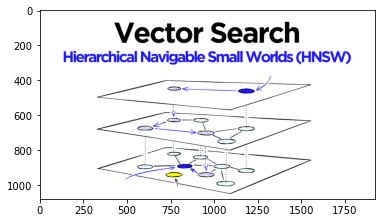

In [226]:
plt.imshow(mpimg.imread('../static/images/hnsw-0.jpg'))

In [202]:
import hnswlib
import numpy as np
import pickle

dim = 512
num_elements = len(courses)
print("length of courses is: " + str(num_elements))

# Generating sample data
data = message_embeddings
ids = np.arange(num_elements)

# Declaring index
p = hnswlib.Index(space = 'cosine', dim = dim) # possible options are l2, cosine or ip

# Initializing index - the maximum number of elements should be known beforehand
p.init_index(max_elements = num_elements, ef_construction = 200, M = 16)

# Element insertion (can be called several times):
p.add_items(data, ids)

# Controlling the recall by setting ef:
p.set_ef(50) # ef should always be > k

# Query dataset, k - number of closest elements (returns 2 numpy arrays)
labels, distances = p.knn_query(data[300], k = 5)

length of courses is: 844


In [219]:
labels, distances = p.knn_query(data[420], k = 5)

In [203]:
print(message_embeddings[0])
print(message_embeddings)

tf.Tensor(
[ 2.25954619e-03 -7.93654695e-02 -1.90313589e-02  6.35003448e-02
  7.02708215e-02 -4.90888990e-02 -8.28607753e-03  4.56317067e-02
 -6.26470819e-02 -7.74275437e-02 -4.26994115e-02 -7.64984041e-02
 -6.71898574e-02 -5.25130630e-02 -3.52383032e-02  5.07375374e-02
  7.72186071e-02 -2.61996090e-02  4.27584536e-03 -8.08962956e-02
 -6.35436997e-02  1.94981582e-02 -3.01100351e-02 -1.08768540e-02
  4.60512303e-02  2.73628696e-03  5.15603498e-02 -3.58485058e-02
  6.56862371e-03 -6.49646297e-02  2.94754766e-02 -6.51849434e-02
 -5.74357100e-02  6.86878935e-02  7.27831153e-03 -6.77126646e-02
 -2.20222045e-02  5.37509248e-02 -7.68387243e-02  5.57330176e-02
  2.84505431e-02  1.37725305e-02 -9.97196045e-03  2.60036029e-02
  2.72831451e-02 -3.85654010e-02 -7.22714607e-03  7.63684558e-03
 -3.15203033e-02  2.54327562e-02 -7.84952566e-02  3.43189873e-02
 -2.61251647e-02 -4.68943268e-02  2.81721484e-02 -4.73281890e-02
 -4.96952003e-03  3.25045101e-02  7.41137341e-02 -5.64028993e-02
  6.76015094e-

Use our labels, indicating index of each vector returned from doing a K-NN search, to look at the titles of our recommended courses. Seems to make good recommendations.

In [221]:
print(labels[0])
results = labels[0].tolist()

for index in results:
    print(courses[index]['course_title'])

[420 789 416 140 700]
Marketing and Competitive Strategy in Healthcare
Sport Marketing
Issues in Health Care Leadership
Social Media Analytics
Public Relations Campaigns


In [233]:
p.save_index("index.bin")